## Problem 1: A scatter plot of random points 

The aim of this task is to create a simple scatter plot using random input values and random colors!
Finally, you will save the plot as `.png` file that should look something like this: 
 
![Example figure](img/problem1_example.png)
 
Remember to also commit the image file into your GitHub repo!

**Note**: Your colors may look different than those in the image above depending on the colormap you are using!


### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Creating a DataFrame containing 1000 x, y, and color values
- Creating a scatter plot of these points as instructed
- Adding a title and axis labels to the plot
- Saving a copy of the plot as a PNG file and commiting it to your repo
- Including comments that explain what most lines in the code do

### Part 1 

Create a new DataFrame called `data` and add 1000 random numbers (of type `float`) into a new column `x` and another 1000 random numbers into a new column `y`.

In [3]:
# Moduls importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Creating a DataFrame
data = pd.DataFrame(dtype = float)
data["x"] = np.random.rand(1000)
data["y"] = np.random.rand(1000)

In [4]:
# Check your random values
print(data.head())

# Check that you have the correct number of rows
assert len(data) == 1000, "There should be 1000 rows of data."

          x         y
0  0.110488  0.563145
1  0.912720  0.138582
2  0.554698  0.332572
3  0.267453  0.913211
4  0.812719  0.097735


### Part 2 

Create a variable `colors` in which you should store 1000 random values for the colors so that we get a little sweeter looking plot.

The variable `colors` should be an array of random numbers, not a DataFrame column.

In [5]:
# Creatin the colors variable
colors = [plt.cm.Spectral(each) for each in range(1000)]

In [6]:
#This test print should print out 10 first numbers in the variable colors
print(colors[0:10])

# Check that the length matches
assert len(colors) == 1000, "There should be 1000 random numbers for colors"

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0), (0.6365244136870435, 0.022683583237216455, 0.26282199154171476, 1.0), (0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0), (0.6534409842368321, 0.04144559784698193, 0.2668204536716648, 1.0), (0.6618992695117263, 0.050826605151864664, 0.26881968473663975, 1.0), (0.6703575547866205, 0.0602076124567474, 0.27081891580161477, 1.0), (0.6788158400615149, 0.06958861976163014, 0.2728181468665898, 1.0), (0.6872741253364091, 0.07896962706651288, 0.2748173779315648, 1.0), (0.6957324106113034, 0.08835063437139562, 0.2768166089965398, 1.0)]


### Part 3

#### Part 3.1

Create a scatter plot of points with random colors.

Make the scatter plot using `DataFrame.plot()` with the following options:

- set the type of the plot using parameter `kind=scatter` (or use `DataFrame.plot.scatter()`)
- modify the size of a point using the parameter `s` (the example plot uses `s=100`)
- set the random colors for the points using the parameter `c`
- set the color scheme using the parameter `colormap`
    - The example image uses the `'rainbow'` colormap
    - you can also choose another color map from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    - you can add a black outline around the points using the parameter `edgecolors`. The example uses `edgecolors='black'`.

#### Part 3.2

Add a title, x-label and y-label to your plot as shown in the example figure.

- create the variables `title`, `xlabel` and `ylabel` and store the title and axis label text in them
- use the pandas plotting parameters or `matplotlib.pyplot` methods to add the title and axis labels to the figure

**Feel free to change the colors and markers in the plot :)**

#### Part 3.3

Create a variable `outputfp` with the output filename `my_first_plot.png` and save your plot as a PNG file (**Note**: you have to save the file in the same code cell where you do the plotting). 

F:\Learning\Python-SpatialAanalysis\3-NoteBook\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
F:\Learning\Python-SpatialAanalysis\3-NoteBook\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Saved my first plot as my_first_plot.png


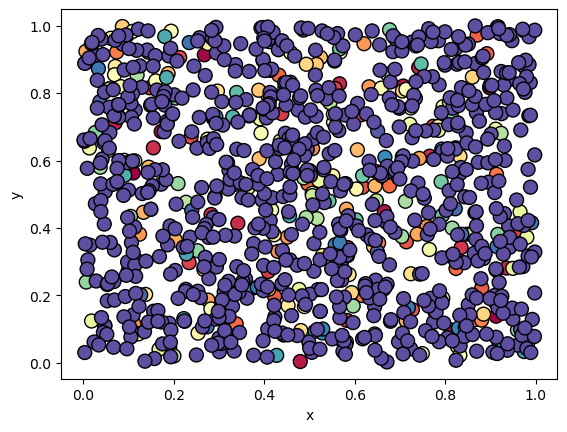

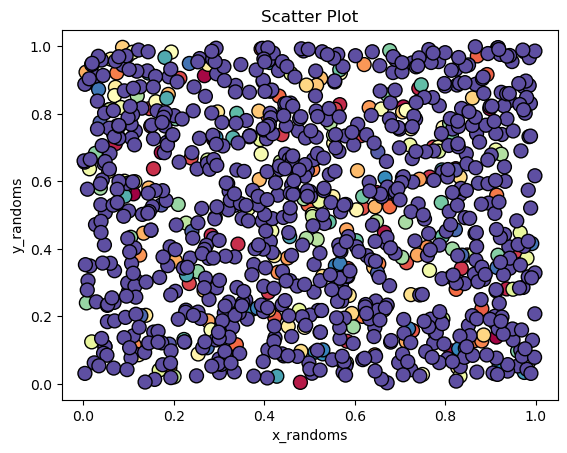

In [7]:
# Plot the scatter plot
data.plot(kind = "scatter", x = "x", y = "y",
              s = 100,
              c = colors,
              colormap = "rainbow",
              edgecolors = "black")

# Add labels and title (if not done above when creating the plot)
title = "Scatter Plot"
xlabel = "x_randoms"
ylabel = "y_randoms"

ax = data.plot(kind = "scatter", x = "x", y = "y",
              s = 100,
              c = colors,
              colormap = "rainbow",
              edgecolors = "black",
              title = title,
              xlabel = xlabel,
              ylabel = ylabel)

# Save the plot as a png file:
outputfp = "my_first_plot.png"
plt.savefig("my_first_plot.png")


# This test print statement should print the output filename of your figure
print(f"Saved my first plot as {outputfp}")

In [8]:
# Check that the file exists (you can also open the file to check that everything looks ok!)
import os

assert os.path.exists(outputfp), "Cannot find the output image!"

## Problem 2 - Plotting temperatures 

In this problem we will  plot monthly mean temperatures from the Helsinki-Vantaa airpot for the past 30 years.

The final output should look like this:
![line plot](img/temp_line_plot.png)

## Input data

The file `data/helsinki-vantaa.csv` contains monthly average temperatures from the Helsinki Vantaa airport.

Column descriptions:

- `DATE`: YEAR-MONTH-DAY (the time stamp contains the first day of each month, but values in other columns are average values for the whole month!)
- `USAF`: Station number
- `TEMP_F`: Monthly mean temperature in Fahrenheit 
- `TEMP_C`: Monthly mean temperature in Celsius
- `REF_TEMP_C`: Long term average in Celsius (for the period 1988-2018)
- `DIFF_C`: Difference between monthly mean and long term average in Celsius



### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Loading the data file and using the dates as the index
- Selecting the data for the 30-year period as described
- Creating a line plot of the data with the specified format
- Adding a title and axis labels to the plot
- Saving a copy of the plot as a PNG file and commiting it to your repo
- Including comments that explain what most lines in the code do

### Part 1 

Load the Helsinki temperature data from the file `data/helsinki-vantaa.csv`.

- Read the data into a variable called `data` using pandas
- Parse the dates from the column `'DATE'` and set the dates as the index in the DataFrame 

In [9]:
# Date reading with the index of DATE
fp = r"data/helsinki-vantaa.csv"
data = pd.read_csv(fp)
data.head()

# Parsing data in a new column called YEAR
data["DATE"] = pd.to_datetime(data["DATE"])
data.set_index("DATE", inplace = True)

In [10]:
# This test print should print first five rows
print(data.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1952-01-01  29740.0  28.347826 -2.028986    -4.93665  2.907665
1953-01-01  29740.0  22.190083 -5.449954    -4.93665 -0.513304
1954-01-01  29740.0  19.864407 -6.741996    -4.93665 -1.805346
1955-01-01  29740.0  22.583333 -5.231481    -4.93665 -0.294831
1956-01-01  29740.0  18.254237 -7.636535    -4.93665 -2.699885


In [11]:
# Check the number of rows in the data frame
print(len(data))

706


### Part 2 

Select data for the 30-year period (January 1988 to December 2018).

- Store the selection in a new variable `selection`

In [12]:
# Selecting data for 1988-2018
data["date"] = data.index # I tried a lot to select the period (1988-2018) using "DATE" field which is the index column. However, pandas couldn't recognized the field and retured key error for the "DATE" field. So, I copied its data to a new column.
selection = data[(data["date"] >= "1988-01-01") & (data["date"] <= "2018-12-01")]

In [13]:
# Check that the data was read in correctly:
selection.head()

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C,date
DATE,,,,,,
1988-01-01,29740.0,27.404003,-2.553332,-4.93665,2.383318,1988-01-01
1989-01-01,29740.0,31.553337,-0.248146,-4.93665,4.688504,1989-01-01
1990-01-01,29740.0,25.030890,-3.871728,-4.93665,1.064922,1990-01-01
1991-01-01,29740.0,26.592345,-3.004253,-4.93665,1.932397,1991-01-01
1992-01-01,29740.0,29.107965,-1.606686,-4.93665,3.329964,1992-01-01


In [14]:
# Check how many rows of data you selected:
print(f'Number of rows: {len(selection)}')

Number of rows: 372


### Part 3 

#### Part 3.1

Create a line plot that displays the temperatures (`TEMP_C`) for each month in the 30-year time period with the following format:
     
- Set the figure size

    - Create a figure object and use the `figsize` parameter. 
    - The example figure uses `figsize=(14,6)` (you can experiment with other figure sizes if you like!)

- Adjust the line style

    - solid line 
    - black color
    - round markers
     
- Add a title and axis labels

    - Title: `'Helsinki-Vantaa Airport'` 
    - X-label: `'Time'`
    - Y-label: `'Temperature (Celsius)'`

#### Part 3.2

Save your figure as PNG file called `temp_line_plot.png`.

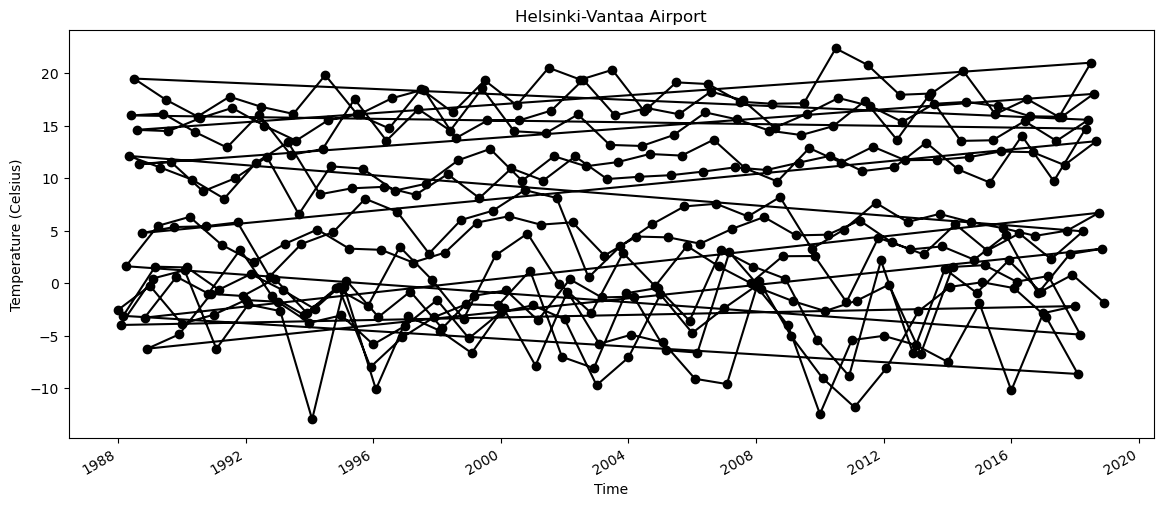

In [15]:
# Craeting a line plot from "TEMP_C" column
selection["TEMP_C"].plot(
               kind = "line", 
               figsize = (14, 6), 
               style = "ko", 
               linestyle = "solid", 
               title = "Helsinki-Vantaa Airport", 
               xlabel = "Time", 
               ylabel = "Temperature (Celsius)")

# Set output file name
outputfp = "temp_line_plot.png"

# Save plot as image
plt.savefig("my_first_plot.png")

In [16]:
import os

# Check that output file exists (you can also open the file and check that the plot looks ok!)
os.path.exists(outputfp)

False

# It is Done with your help.
### Thank you very much